In [1]:
import pandas as pd
import numpy as np
from matplotlib.ticker import MultipleLocator
from lmfit import Model,Parameter,Parameters
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy.stats import norm
import os
from functions import plot_preprocessed_dist,plot_track_characteristics,mmsd_plot,cutoff_function,msd
from scipy.stats import ks_2samp

%matplotlib inline
%reload_ext autoreload

# Investigate the difference in the $D$-distributions between the two experiments for different minimum number of frames and $R^2$ thresholds

The computation is very long! You've been warned.

Instead of $R^2$, we can vary the number of fit points for the MSD, which could be interesting to check too. 

KS statistic =  0.06497141345462876
bootstrap p-value =  0.0


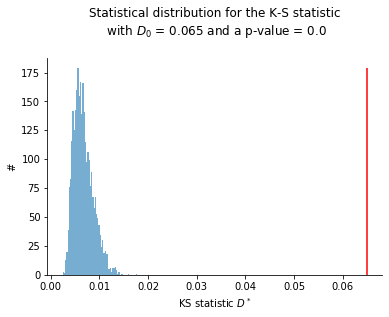

KS statistic =  0.062278729680458056
bootstrap p-value =  0.0


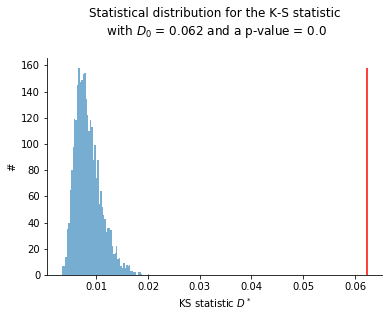

KS statistic =  0.05830257852870162
bootstrap p-value =  0.0


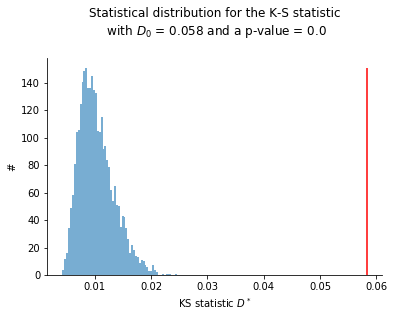

KeyboardInterrupt: 

In [30]:
from functions import data_pool,kolmogorov_smirnov

files1 = ["Data/SM1/sm1_ld400.csv","Data/SM2/sm2_ld400.csv","Data/SM3/sm3_ld400.csv","Data/SM4/sm4_ld400.csv","Data/SM5/sm5_ld400.csv","Data/SM6/sm6_ld400.csv","Data/SM7/sm7_ld400.csv","Data/SM8/sm8_ld400.csv","Data/SM9/sm9_ld400.csv","Data/SM10/sm10_ld400.csv"]
files2 = ["Data/SM1_WNT/sm1_wnt_ld400.csv","Data/SM2_WNT/sm2_wnt_ld400.csv","Data/SM3_WNT/sm3_wnt_ld400.csv","Data/SM4_WNT/sm4_wnt_ld400.csv","Data/SM5_WNT/sm5_wnt_ld400.csv","Data/SM6_WNT/sm6_wnt_ld400.csv","Data/SM7_WNT/sm7_wnt_ld400.csv","Data/SM8_WNT/sm8_wnt_ld400.csv","Data/SM10_WNT/sm10_wnt_ld400.csv"]

dt = 0.05
maxframe = 500
MinFrame = np.linspace(5,12,8)
R2 = np.linspace(0.6,0.95,8)

phase_portrait = np.zeros((len(MinFrame),len(R2)))
for j in range(len(R2)):
    for i in range(len(MinFrame)):
        minframe = MinFrame[i]
        rsquared_threshold = R2[j]
        
        DATA1 = data_pool(files1,dt,minframe,maxframe,rsquared_threshold,fit_option="thirty_percent")
        DATA2 = data_pool(files2,dt,minframe,maxframe,rsquared_threshold,fit_option="thirty_percent")
        
        D1 = []
        for k in range(np.shape(DATA1)[0]):
            D1.append(DATA1[k][1])
            
        D2 = []
        for k in range(np.shape(DATA2)[0]):
            D2.append(DATA2[k][1])
        
        stat,pvalue = kolmogorov_smirnov(D1,D2,nloop=3000,plot=True)
        
        phase_portrait[i][j] = pvalue
             
import seaborn as sns
heat_map = sns.heatmap(phase_portrait.round(decimals=2), linewidths=.1, annot=True, xticklabels=[int(a) for a in MinFrame], yticklabels=[round(a,2) for a in R2])
plt.xlabel('Minframe')
plt.ylabel(r'$R^2$')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
#DATA = data_pool(files,dt,minframe,maxframe,rsquared_threshold,images=images,fit_option="thirty_percent")
